# Install required packages

In [1]:
%pip install transformers datasets
%pip install pandas
%pip install matplotlib
%pip install umap-learn
%pip install datashader bokeh holoviews colorcet scikit-image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import transformers


/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [3]:
from pathlib import Path


DATA_DIR = Path.home() / "Documents" / "SemanticsOfSustainability" / "data" / "Joris"
assert DATA_DIR.is_dir()


In [4]:
def to_decade(year: int) -> str:
    start = int(year / 10) * 10
    return f"{start} - {start+10}"


## ANP

In [5]:
ANP_DIR = DATA_DIR / "ANP" / "CleanFiles_perYear"
assert ANP_DIR.is_dir()


In [6]:
from tqdm import tqdm


FILE_GLOB = "ANP_19[0-9][0-9].csv.gz"
ENCODING = "iso8859_15"

anp = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="content")
            for f in ANP_DIR.glob(FILE_GLOB)
        ),
        total=len(list(ANP_DIR.glob(FILE_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()
anp["decade"] = anp["year"].apply(to_decade)


anp


Reading: 100%|██████████| 48/48 [00:16<00:00,  2.97file/s]


,filename,content,date,year,month,day,issue,decade
0,anp_1952_01_01_10_ocr.xml,Red.: Datum: veldman 1-1-52 Tijd: 13 ttt^....,1952-01-01,1952,1,1,10,1950 - 1960
1,anp_1952_01_01_11_ocr.xml,Red. Datum: Tijd: Onderwerp: veltmeijer 1...,1952-01-01,1952,1,1,11,1950 - 1960
2,anp_1952_01_01_12_ocr.xml,/3* Red. Datum: Tijd: Onderwerp: veltmei...,1952-01-01,1952,1,1,12,1950 - 1960
3,anp_1952_01_01_13_ocr.xml,Red.: Datum: Tijd: Onderwerp: veltmeijer ...,1952-01-01,1952,1,1,13,1950 - 1960
4,anp_1952_01_01_14_ocr.xml,Red.: Datum: Tijd: Onderwerp: mallon 1-1-...,1952-01-01,1952,1,1,14,1950 - 1960
...,...,...,...,...,...,...,...,...
1474644,anp_1973_12_31_96_ocr.xml,Red.: Datum: Tijd: Onderwerp: kreek 31. 12. 7...,1973-12-31,1973,12,31,96,1970 - 1980
1474645,anp_1973_12_31_97_ocr.xml,Red.: Datum: Tijd: Onderwerp: kuy 31-12-...,1973-12-31,1973,12,31,97,1970 - 1980
1474646,anp_1973_12_31_98_ocr.xml,Red. Datum: Tijd: Onderwerp: kreek 31. 12...,1973-12-31,1973,12,31,98,1970 - 1980
1474647,anp_1973_12_31_99_ocr.xml,Red. Datum: Tijd: Onderwerp: zijl 31-12-...,1973-12-31,1973,12,31,99,1970 - 1980


Text(0, 0.5, 'Number of Documents')

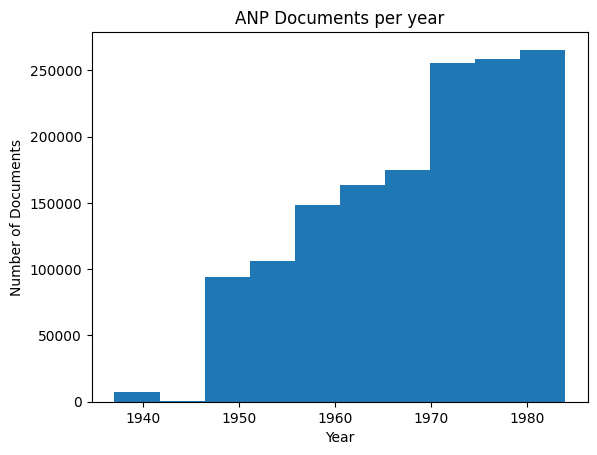

In [7]:
plt.hist(anp.year, label="Year")
plt.title("ANP Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

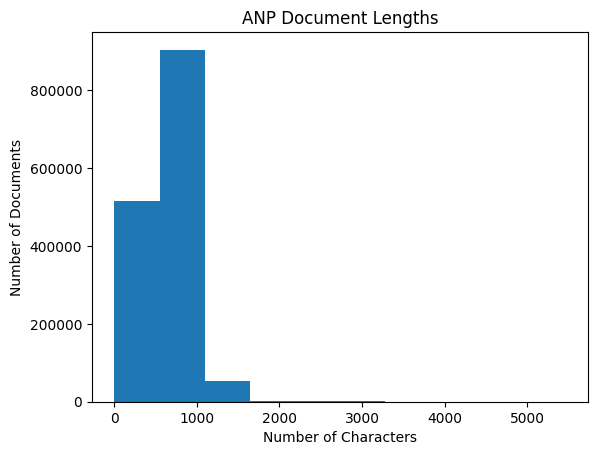

In [8]:
plt.hist(anp.content.str.len())
plt.title("ANP Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


## StatenGeneraal

In [9]:
SG_DIR = DATA_DIR / "StatenGeneraal"

assert SG_DIR.is_dir()

SG_GLOB = "StatenGeneraal_[12][890][0-9][0-9].csv.gz"
#SG_GLOB = "StatenGeneraal_1814.csv.gz"


In [10]:
from tqdm import tqdm

ENCODING = "iso8859_15"


staten_generaal = pd.concat(
    tqdm(
        (
            pd.read_csv(
                f, compression="gzip", sep=";", encoding=ENCODING, parse_dates=["date"]
            ).dropna(subset="Content")
            for f in SG_DIR.glob(SG_GLOB)
        ),
        total=len(list(SG_DIR.glob(SG_GLOB))),
        unit="file",
        desc="Reading",
    ),
    ignore_index=True,
).convert_dtypes()

staten_generaal


Reading: 100%|██████████| 205/205 [01:29<00:00,  2.28file/s]


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers
0,144302,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Rijksbegroting voor het dienstjaar 1976. Defensie,BRIEF VAN DE MINISTER VAN DEFENSIE,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
1,144303,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging Liquidatiewet invaliditeitswetten,KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
2,144304,1976-01-02,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,"Naturalisatie van Bakarbessy, Jacobus Hermanus...",KONINKLIJKE BOODSCHAP,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,1,StatenGeneraal,<NA>,<NA>
3,144305,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Wijziging van de Kleuteronderwijswet (Stb. 197...,VERSLAG,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
4,144306,1976-01-05,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Uitvoering van artikel 15 van de Comptabilitei...,NOTA NAAR AANLEIDING VAN HET VERSLAG,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3",StatenGeneraal,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187141,108,1857-12-02 00:00:00,nl.proc.sgd.d.185718580000114,Handelingen Tweede Kamer 1857-1858 02 december...,Verbatim Proceedings,<NA>,1857,65ste vel. â 227 â Tweede Kamer.ZITTIN G V...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00697: mp, de heer: Kien; nl.m.00473: cha..."
187142,109,1857-12-07 00:00:00,nl.proc.sgd.d.185718580000115,Handelingen Tweede Kamer 1857-1858 07 december...,Verbatim Proceedings,<NA>,1857,G7stc vel. â 235 TV Tweede Kamer.27ste IIfT1...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00855: mp, De heer: baron van Lynden; nl...."
187143,110,1857-12-10 00:00:00,nl.proc.sgd.d.185718580000116,Handelingen Tweede Kamer 1857-1858 10 december...,Verbatim Proceedings,<NA>,1857,68ste vel. 237 â Tweede Kamer.Z1TITN G VAN D...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.02118: government, minister: Vrolik; nl.m..."
187144,111,1857-12-11 00:00:00,nl.proc.sgd.d.185718580000117,Handelingen Tweede Kamer 1857-1858 11 december...,Verbatim Proceedings,<NA>,1857,73ste vel. â 255 â Tweede Kamer.LXf. liuit...,<NA>,<NA>,TweedeKamer,1857-1858,"nl.m.00918: mp, De heer: Meijlink; nl.m.01557:..."


Text(0, 0.5, 'Number of Documents')

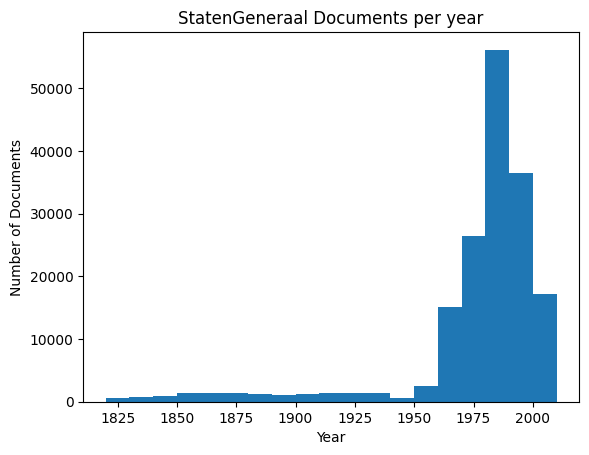

In [11]:
plt.hist(staten_generaal.year, label="Year", bins=range(1820, 2020, 10))
plt.title("StatenGeneraal Documents per year")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0.5, 0, 'Number of Characters')

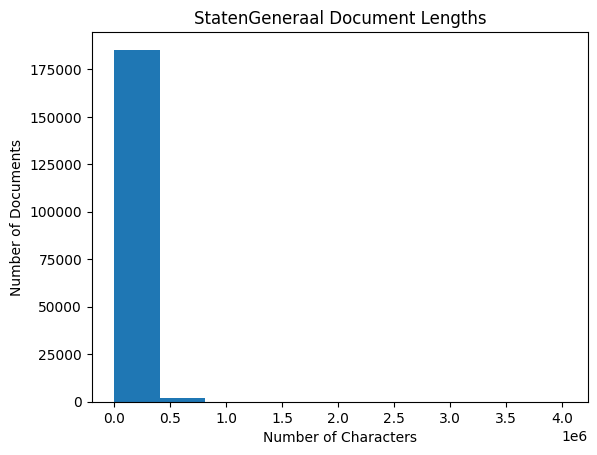

In [12]:
plt.hist(staten_generaal.Content.str.len())
plt.title("StatenGeneraal Document Lengths")
plt.ylabel("Number of Documents")
plt.xlabel("Number of Characters")


# Load Model

In [13]:
MODEL_NAME = "DTAI-KULeuven/robbertje-1-gb-non-shuffled"  # NL MODEL TODO: is the model trained on lowercased data?

MODEL_MAX_LENGTH = 512


In [14]:
from transformers import AutoTokenizer, pipeline
from transformers.pipelines.feature_extraction import FeatureExtractionPipeline


tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, model_max_length=MODEL_MAX_LENGTH, truncation=True
)
# model = RobertaModel.from_pretrained(MODEL_NAME)

# FIXME: cannot use pipeline for extracting layers other than the last one
model: FeatureExtractionPipeline = pipeline(
    "feature-extraction",
    model=MODEL_NAME,
    tokenizer=tokenizer,
    max_length=MODEL_MAX_LENGTH,
    truncation=True,
)


Some weights of the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at DTAI-KULeuven/robbertje-1-gb-non-shuffled and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this mode

# Compute Embeddings

In [15]:
TERM = "duurzaam"


In [16]:
term_token_ids = model.tokenizer(TERM)["input_ids"]
print(term_token_ids)

print(model.tokenizer.convert_ids_to_tokens(term_token_ids))


[0, 6395, 4249, 2]
['<s>', 'duur', 'zaam', '</s>']


## ANP

In [17]:
anp[TERM] = anp.content.str.contains(TERM)
anp.loc[anp[TERM]]


,filename,content,date,year,month,day,issue,decade,duurzaam
3108,anp_1952_02_11_46_ocr.xml,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952-11-02,1952,2,11,46,1950 - 1960,True
15594,anp_1952_07_19_31_ocr.xml,"Red: Kprp, Datum: 19 Juli' 52 Tijd: HOC ...",1952-07-19,1952,7,19,31,1950 - 1960,True
23851,anp_1952_11_03_25_ocr.xml,Red: mallon Datum: 3-*ll?52 Tijd: Onderwe...,1952-03-11,1952,11,3,25,1950 - 1960,True
23861,anp_1952_11_03_34_ocr.xml,Red: Datum: Tijd: Onderwerp: m-llon 3-11...,1952-03-11,1952,11,3,34,1950 - 1960,True
27918,anp_1952_12_29_48_ocr.xml,"Red: Rpmijn Datum: 29 Dec. 52 Tijd: 23, 0...",1952-12-29,1952,12,29,48,1950 - 1960,True
...,...,...,...,...,...,...,...,...,...
1444295,anp_1973_06_16_152_ocr.xml,Red.: Datum: Tijd: Onderwerp: .Leeuw... 1...,1973-06-16,1973,6,16,152,1970 - 1980,True
1444406,anp_1973_06_17_10_ocr.xml,Red.: Datum: Tijd: Onderwerp: duijv . 1....,1973-06-17,1973,6,17,10,1970 - 1980,True
1444456,anp_1973_06_17_1_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjy 17 6 ...,1973-06-17,1973,6,17,1,1970 - 1980,True
1444475,anp_1973_06_17_37_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjv 17. ...,1973-06-17,1973,6,17,37,1970 - 1980,True


Text(0, 0.5, 'Number of Documents')

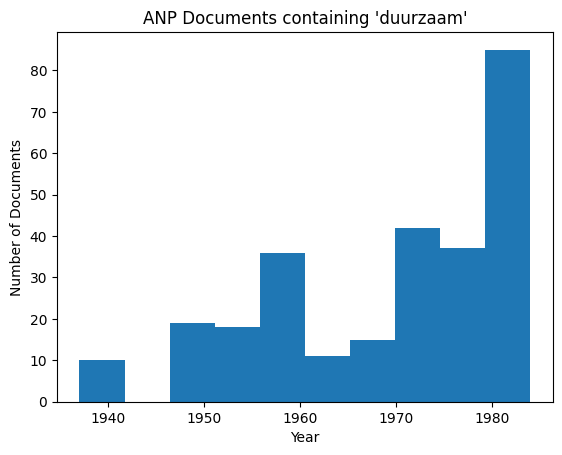

In [18]:
plt.hist(anp.loc[anp.content.str.contains(TERM)].year)
plt.title(f"ANP Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

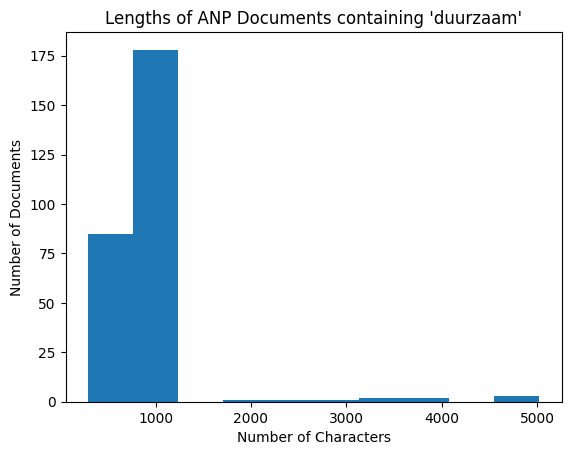

In [19]:
plt.hist(anp.loc[anp[TERM]].content.str.len())
plt.title(f"Lengths of ANP Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")


## Find Contexts

### ANP

In [20]:
from src import Context

contexts = []
filtered_anp = []

for index, row in anp.loc[anp.content.str.contains(TERM)].iterrows():
    for context in Context.contexts(
        row.content,
        TERM,
        MODEL_MAX_LENGTH * 5,
        model,
        {"date": row.date, "source": row.filename},
    ):
        if context.has_word():
            contexts.append(context)
        else:
            filtered_anp.append(index)

print(f"Contexts found for '{TERM}': {len(contexts)}")
print(f"String matches filtered out from ANP: {len(filtered_anp)}")

Token indices sequence length is longer than the specified maximum sequence length for this model (654 > 512). Running this sequence through the model will result in indexing errors


Contexts found for 'duurzaam': 283
String matches filtered out from ANP: 0


### Staten Generaal

In [21]:
filtered_sg = []

for index, row in staten_generaal.loc[
    staten_generaal.Content.str.contains(TERM)
].iterrows():
    for context in Context.contexts(
        row.Content,
        TERM,
        MODEL_MAX_LENGTH * 5,
        model,
        {"date": row.date, "source": row.RecId},
    ):
        if context.has_word():
            contexts.append(context)
        else:
            filtered_sg.append(index)

print(f"Contexts found for '{TERM}': {len(contexts)}")
print(f"String matches filtered out from Staten Generaal: {len(filtered_sg)}")

# TODO: are filtered out correct?


Contexts found for 'duurzaam': 26373
String matches filtered out from Staten Generaal: 0


In [45]:
BATCH_SIZE = 10
batch = [context for context in contexts[:BATCH_SIZE]]
token_embeddings = np.array([context.token_embedding() for context in batch])

assert token_embeddings.shape == (BATCH_SIZE, model.model.config.hidden_size)


## StatenGeneraal (Stats)

In [40]:
staten_generaal[TERM] = staten_generaal.Content.str.contains(TERM)
staten_generaal.loc[staten_generaal[TERM]]


,Unnamed: 0,date,RecId,title,type,description,year,Content,ocr_link,pages,chamber,leg_period,speakers,duurzaam
115,144430,1976-01-23,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Afsluiting Oosterschelde,BRIEF VAN DE MINISTER VAN VERKEER EN WATERSTAAT,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True
155,144471,1976-01-29,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 29 januari ...,Handelingen Tweede Kamer 1975-1976 29 januari ...,1976,42ste Vergadering Voorzitter: Vondeling Tegenw...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534...",StatenGeneraal,<NA>,<NA>,True
163,144479,1976-01-30,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Vaststelling van Boek 6 van het nieuwe Burgerl...,MEMORIE VAN ANTWOORD,1976,Tweede Kamer der Staten-Generaal Zitting 1975-...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True
174,144507,1976-02-03,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Kamerstuk,Kwantitatieve beperkingen in de olieaanvoer,VERSLAG VAN OPENBARE GESPREKKEN,1976,Tweede Kamer der Staten-Generaal 2 Zitting 197...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",StatenGeneraal,<NA>,<NA>,True
220,144561,1976-02-10,https://services.kb.nl/mdo/oai?verb=GetRecord&...,Handelingen,Handelingen Tweede Kamer 1975-1976 10 februari...,Handelingen Tweede Kamer 1975-1976 10 februari...,1976,46ste Vergadering Dinsdag 10 februari 1976 Aan...,http://resolver.kb.nl/resolve?urn=sgd:19751976...,"2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718...",StatenGeneraal,<NA>,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187064,31,1857-05-13 00:00:00,nl.proc.sgd.d.185618570000168,Handelingen Tweede Kamer 1856-1857 13 mei 1857...,Verbatim Proceedings,<NA>,1857,212de vel. 773 Tweede Kamer.XCIX. Intrekking v...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts...",True
187080,47,1857-06-30 00:00:00,nl.proc.sgd.d.185618570000184,Handelingen Tweede Kamer 1856-1857 30 juni 185...,Verbatim Proceedings,<NA>,1857,266ste vel. â 975 â Tweede Kamer.ZITTIN G ...,<NA>,<NA>,TweedeKamer,1856-1857,": mp, De heer: Nolthenlu s; nl.m.00455: mp, De...",True
187086,53,1857-07-07 00:00:00,nl.proc.sgd.d.185618570000190,Handelingen Tweede Kamer 1856-1857 07 juli 185...,Verbatim Proceedings,<NA>,1857,290ste vel. 1065 Tweede Kamer.LXXXIV . Lager O...,<NA>,<NA>,TweedeKamer,1856-1857,"nl.m.00473: chair, voorzitter: baron van Golts...",True
187112,79,1857-12-23 00:00:00,nl.proc.sgd.d.185718580000052,Handelingen Eerste Kamer 1857-1858 23 december...,Verbatim Proceedings,<NA>,1857,21ste vel. 67 â Eerste Kamer.ZITTIN G VAN DE...,<NA>,<NA>,EersteKamer,1857-1858,"nl.m.01176: mp, De heer: Sassen; : mp, De heer...",True


Text(0, 0.5, 'Number of Documents')

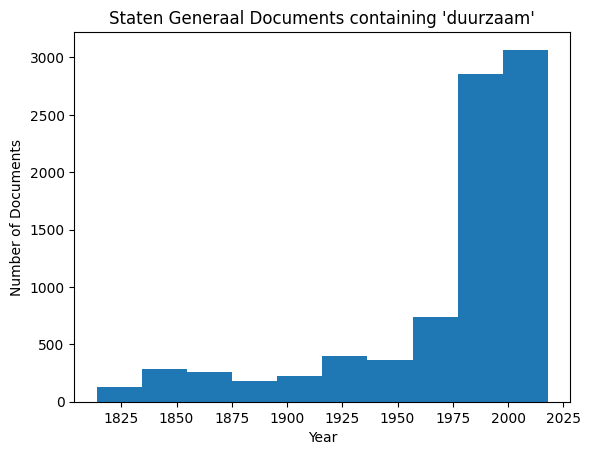

In [41]:
plt.hist(staten_generaal.loc[staten_generaal[TERM]].year)
plt.title(f"Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Year")
plt.ylabel("Number of Documents")


Text(0, 0.5, 'Number of Documents')

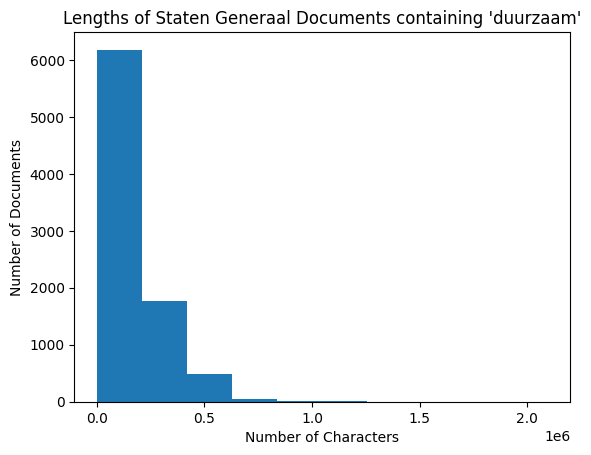

In [42]:
plt.hist(staten_generaal.loc[staten_generaal[TERM]].Content.str.len())
plt.title(f"Lengths of Staten Generaal Documents containing '{TERM}'")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")


# Plot

In [42]:
import umap.plot

umap.plot.output_notebook()

title = f"UMAP Embeddings Projections for '{TERM}'"


Loading BokehJS ...

In [43]:
mapper = umap.UMAP().fit(token_embeddings)


/Users/carstenschnober/opt/anaconda3/envs/SoS/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [32]:
#TODO: delete
anp.loc[indices_anp, "x"] = mapper.embedding_[:, 0]
anp.loc[indices_anp, "y"] = mapper.embedding_[:, 1]
anp.loc[indices_anp]


,filename,content,date,year,month,day,issue,decade,duurzaam,Sentence,embeddings,x,y
3108,anp_1952_02_11_46_ocr.xml,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952-11-02,1952,2,11,46,1950 - 1960,True,Sentence(text=' Red.: mallon :-:. raa. üx Dat...,"[[0.4188813269138336, -0.36967822909355164, 0....",1.348351,6.208056
3108,anp_1952_02_11_46_ocr.xml,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952-11-02,1952,2,11,46,1950 - 1960,True,Sentence(text=' Red.: mallon :-:. raa. üx Dat...,"[[0.4188813269138336, -0.36967822909355164, 0....",1.348351,6.208056
23851,anp_1952_11_03_25_ocr.xml,Red: mallon Datum: 3-*ll?52 Tijd: Onderwe...,1952-03-11,1952,11,3,25,1950 - 1960,True,Sentence(text=' Red: mallon Datum: 3-*ll?52...,"[[0.12576256692409515, 0.36140355467796326, 0....",5.266006,6.976274
23861,anp_1952_11_03_34_ocr.xml,Red: Datum: Tijd: Onderwerp: m-llon 3-11...,1952-03-11,1952,11,3,34,1950 - 1960,True,Sentence(text=' Red: Datum: Tijd: Onderwerp...,"[[0.16293135285377502, 0.07791978865861893, 0....",3.582295,3.669269
57338,anp_1976_07_27_60_ocr.xml,Red.: aa Datum: 27 7 76 Tijd: 23. 55 On...,1976-07-27,1976,7,27,60,1970 - 1980,True,Sentence(text=' Red.: aa Datum: 27 7 76 Ti...,"[[0.18945671617984772, 0.08487167954444885, -0...",7.210629,8.207671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444295,anp_1973_06_16_152_ocr.xml,Red.: Datum: Tijd: Onderwerp: .Leeuw... 1...,1973-06-16,1973,6,16,152,1970 - 1980,True,"Sentence(text="" Red.: Datum: Tijd: Onderwer...","[[0.2423732578754425, -0.6394202709197998, 0.2...",2.185633,5.662143
1444406,anp_1973_06_17_10_ocr.xml,Red.: Datum: Tijd: Onderwerp: duijv . 1....,1973-06-17,1973,6,17,10,1970 - 1980,True,"Sentence(text="" Red.: Datum: Tijd: Onderwer...","[[-0.6191000938415527, -0.2804802358150482, 0....",3.377527,3.831540
1444456,anp_1973_06_17_1_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjy 17 6 ...,1973-06-17,1973,6,17,1,1970 - 1980,True,Sentence(text=' Red.: Datum: Tijd: Onderwerp...,"[[0.21491506695747375, 0.5356446504592896, -0....",5.696290,8.106989
1444475,anp_1973_06_17_37_ocr.xml,Red.: Datum: Tijd: Onderwerp: dujjv 17. ...,1973-06-17,1973,6,17,37,1970 - 1980,True,Sentence(text=' Red.: Datum: Tijd: Onderwer...,"[[-0.00537773035466671, 0.46493324637413025, -...",5.729012,8.160917


## Static

Text(0.5, 1.0, "UMAP Embeddings Projections for 'duurzaam'")

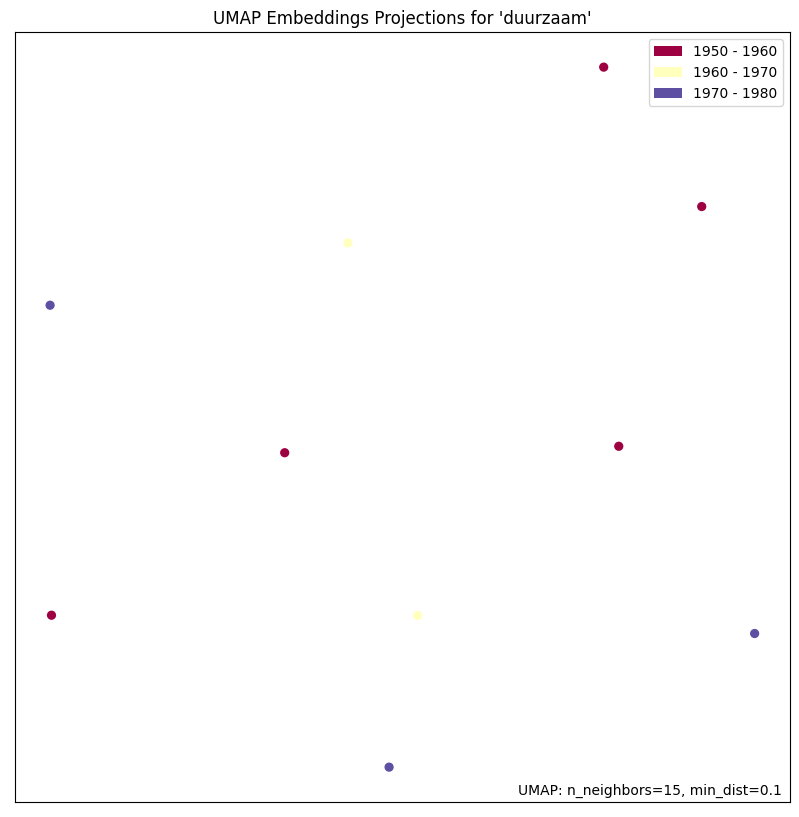

In [60]:
labels = np.array([to_decade(context.metadata["date"].year) for context in batch])
subplot = umap.plot.points(mapper, height=1000, width=1000, labels=labels)
subplot.set_title(title)


## Interactive

In [34]:
from bokeh.models import ColumnDataSource

#df = anp.loc[indices_anp][["content", "year", "filename", "decade", "x", "y"]]
metadatas = [context.metadata for context in batch]
#df["content"] = df["content"].str.replace(TERM, TERM.upper())
source = ColumnDataSource(data=metadatas)
df


,content,year,filename,decade,x,y
3108,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952,anp_1952_02_11_46_ocr.xml,1950 - 1960,1.348351,6.208056
3108,Red.: mallon :-:. raa. üx Datum: 11-2-52 T...,1952,anp_1952_02_11_46_ocr.xml,1950 - 1960,1.348351,6.208056
23851,Red: mallon Datum: 3-*ll?52 Tijd: Onderwe...,1952,anp_1952_11_03_25_ocr.xml,1950 - 1960,5.266006,6.976274
23861,Red: Datum: Tijd: Onderwerp: m-llon 3-11...,1952,anp_1952_11_03_34_ocr.xml,1950 - 1960,3.582295,3.669269
57338,Red.: aa Datum: 27 7 76 Tijd: 23. 55 On...,1976,anp_1976_07_27_60_ocr.xml,1970 - 1980,7.210629,8.207671
...,...,...,...,...,...,...
1444295,Red.: Datum: Tijd: Onderwerp: .Leeuw... 1...,1973,anp_1973_06_16_152_ocr.xml,1970 - 1980,2.185633,5.662143
1444406,Red.: Datum: Tijd: Onderwerp: duijv . 1....,1973,anp_1973_06_17_10_ocr.xml,1970 - 1980,3.377527,3.831540
1444456,Red.: Datum: Tijd: Onderwerp: dujjy 17 6 ...,1973,anp_1973_06_17_1_ocr.xml,1970 - 1980,5.696290,8.106989
1444475,Red.: Datum: Tijd: Onderwerp: dujjv 17. ...,1973,anp_1973_06_17_37_ocr.xml,1970 - 1980,5.729012,8.160917


In [37]:
from bokeh.plotting import figure, show

p = figure(
    height=1000,
    width=1000,
    tooltips=[("filename", "@filename"), ("content", "@content"), ("year", "@year")],
)
p.title = title


In [38]:
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
import bokeh.palettes

categories = anp.decade.unique()
palette = bokeh.palettes.Category20[len(categories)]

assert len(palette) >= len(
    categories
), f"Palette has only {len(palette)} categories, but {len(categories)} needed."

color_mapper = CategoricalColorMapper(
    factors=[str(c) for c in categories], palette=palette
)
color_mapper


CategoricalColorMapper(id='1109', ...)

In [39]:
from bokeh.models.tickers import SingleIntervalTicker
from bokeh.plotting import figure, show

p = figure(
    height=1000,
    width=1000,
    tooltips=[("filename", "@filename"), ("content", "@content"), ("year", "@year")],
)
p.title = title

# TODO: group by decade to enable muting decades individually via legend
p.dot(
    x="x",
    y="y",
    legend_field="decade",
    source=source,
    size=20,
    color={"field": "decade", "transform": color_mapper},
)

p.legend.click_policy = "mute"


p.xaxis.ticker = SingleIntervalTicker(desired_num_ticks=0)
p.yaxis.ticker = SingleIntervalTicker(desired_num_ticks=0)

show(p)
